# **Import**

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(lubridate)
library(leaflet)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘psych’




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [2]:
df <- read.csv('/kaggle/input/water-quality-and-sewage-system-dataset/503722b3dfc0a9012d787d07340fd309eb648a9f96c9017656a167f76eb7b209.csv')

**Column Descriptions**
* Geographical Location (Latitude): This column shows the latitude coordinates of the water sampling sites, indicating their north-south position on the Earth.
* Geographical Location (Longitude): This column provides the longitude coordinates, representing the east-west position of the sampling sites.
* Sampling Date: This column lists the dates when water samples were collected, helping to track changes over time.
* Nitrogen (mg/L): This column gives the concentration of nitrogen in the water samples, measured in milligrams per liter (mg/L). High nitrogen levels can indicate pollution.
* Phosphorus (mg/L): This column shows the concentration of phosphorus in the water samples, also measured in mg/L. Like nitrogen, high phosphorus levels can contribute to water quality issues.
* State of Sewage System: This column describes the condition of the sewage system in the area where the sample was taken. Categories include "Good," "Moderate," and "Poor," indicating the effectiveness of sewage management.

In [3]:
str(df)

'data.frame':	40080 obs. of  6 variables:
 $ Geographical.Location..Latitude. : num  5.2 -64.2 -7.89 -11.33 -24.53 ...
 $ Geographical.Location..Longitude.: num  -55 94.5 -90.5 110.8 -147.6 ...
 $ Sampling.Date                    : chr  "2022-06-10" "2018-10-12" "2023-02-16" "2021-10-17" ...
 $ Nitrogen..mg.L.                  : num  7.18 9.74 6.78 3.34 8.75 ...
 $ Phosphorus..mg.L.                : num  2.32 1.02 4.72 3.32 4.68 ...
 $ State.of.Sewage.System           : chr  "Good" "Good" "Good" "Moderate" ...


In [4]:
dim(df)

[1] 40080     6

In [5]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Geographical.Location..Latitude.,1,40080,0.1713493,51.8254096,0.5763267,0.2918675,66.740466,-8.995431e+01,89.993523,179.947832,-1.514516e-02,-1.195589,0.258868309
Geographical.Location..Longitude.,2,40080,-0.6260472,104.8488861,-1.6782889,-0.8204800,136.089327,-1.799715e+02,179.985338,359.956803,1.162625e-02,-1.226989,0.523720971
Sampling.Date*,3,40080,1716.7939122,984.5596827,1716.0000000,1719.7272954,1263.175200,1.000000e+00,3401.000000,3400.000000,-1.609411e-02,-1.204061,4.917882987
Nitrogen..mg.L.,4,40080,5.0206903,2.9139998,5.0136871,5.0252360,3.775308,3.381438e-03,9.999745,9.996364,-1.244958e-02,-1.213541,0.014555451
Phosphorus..mg.L.,5,40080,2.4998631,1.4398971,2.5163711,2.4995090,1.869020,6.771188e-05,4.999669,4.999601,3.416452e-05,-1.205470,0.007192297
State.of.Sewage.System*,6,40080,1.6900200,0.7706797,1.5000000,1.6125250,0.741300,1.000000e+00,3.000000,2.000000,5.944967e-01,-1.084364,0.003849551


In [6]:
summary(df)

 Geographical.Location..Latitude. Geographical.Location..Longitude.
 Min.   :-89.9543                 Min.   :-179.971                 
 1st Qu.:-44.4706                 1st Qu.: -92.737                 
 Median :  0.5763                 Median :  -1.678                 
 Mean   :  0.1714                 Mean   :  -0.626                 
 3rd Qu.: 45.5205                 3rd Qu.:  91.033                 
 Max.   : 89.9935                 Max.   : 179.985                 
 Sampling.Date      Nitrogen..mg.L.     Phosphorus..mg.L. 
 Length:40080       Min.   : 0.003381   Min.   :0.000068  
 Class :character   1st Qu.: 2.469945   1st Qu.:1.237920  
 Mode  :character   Median : 5.013687   Median :2.516371  
                    Mean   : 5.020690   Mean   :2.499863  
                    3rd Qu.: 7.563102   3rd Qu.:3.757351  
                    Max.   : 9.999745   Max.   :4.999669  
 State.of.Sewage.System
 Length:40080          
 Class :character      
 Mode  :character      
               

**Check missing value**

In [7]:
Na <- colSums(is.na(df))
data.frame(Na)

,Na
,<dbl>
Geographical.Location..Latitude.,0
Geographical.Location..Longitude.,0
Sampling.Date,0
Nitrogen..mg.L.,0
Phosphorus..mg.L.,0
State.of.Sewage.System,0


**Duplicate check**

In [8]:
sum(duplicated(df))

[1] 30060

In [9]:
head(df)

,Geographical.Location..Latitude.,Geographical.Location..Longitude.,Sampling.Date,Nitrogen..mg.L.,Phosphorus..mg.L.,State.of.Sewage.System
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,5.201086,-55.02967,2022-06-10,7.181860,2.320506,Good
2,-64.196408,94.48327,2018-10-12,9.735685,1.015308,Good
3,-7.892940,-90.50311,2023-02-16,6.778074,4.718452,Good
4,-11.334248,110.77899,2021-10-17,3.340601,3.315705,Moderate
5,-24.532061,-147.58840,2021-12-01,8.753211,4.682091,Good
6,-71.631934,95.65388,2022-04-30,9.783080,1.076264,Good


In [10]:
tail(df)

,Geographical.Location..Latitude.,Geographical.Location..Longitude.,Sampling.Date,Nitrogen..mg.L.,Phosphorus..mg.L.,State.of.Sewage.System
,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
40075,84.93021,-132.84966,2023-05-02,6.6481243,0.1360505,Poor
40076,32.17343,121.45936,2017-03-11,6.7650696,0.6927720,Moderate
40077,-44.35513,-35.73995,2015-05-16,6.9553353,2.9176162,Moderate
40078,-82.95738,177.97936,2020-08-30,8.7142424,1.6832395,Poor
40079,-17.48353,25.09280,2018-12-13,0.7390585,0.2259671,Good
40080,-32.59950,-117.38313,2022-02-03,4.1750323,1.4407688,Moderate


# **2. Data Transform for Visualization**

In [11]:
names(df) <- c('Latitude','Longitude','Date','Nitrogen_mg.L','Phosphorus_mg.L','State')

In [12]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [13]:
for(i in 1:length(df)){
    if(is.character(df[,i]) == TRUE)
        df[,i] <- as.factor(df[,i])
}

In [14]:
df$Date <- as.Date(df$Date)
df$Year <- year(df$Date)
df$Month <- month(df$Date)

In [15]:
df <- df[c(1,2,4,5,3,7,8,6)]

## **Data Check**

In [16]:
head(df)

,Latitude,Longitude,Nitrogen_mg.L,Phosphorus_mg.L,Date,Year,Month,State
,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<fct>
1,5.201086,-55.02967,7.181860,2.320506,2022-06-10,2022,6,Good
2,-64.196408,94.48327,9.735685,1.015308,2018-10-12,2018,10,Good
3,-7.892940,-90.50311,6.778074,4.718452,2023-02-16,2023,2,Good
4,-11.334248,110.77899,3.340601,3.315705,2021-10-17,2021,10,Moderate
5,-24.532061,-147.58840,8.753211,4.682091,2021-12-01,2021,12,Good
6,-71.631934,95.65388,9.783080,1.076264,2022-04-30,2022,4,Good


# **3. Data Visulization**

## **Boxplot**

In [17]:
options(repr.plot.width = 12.0, repr.plot.height = 10.0)

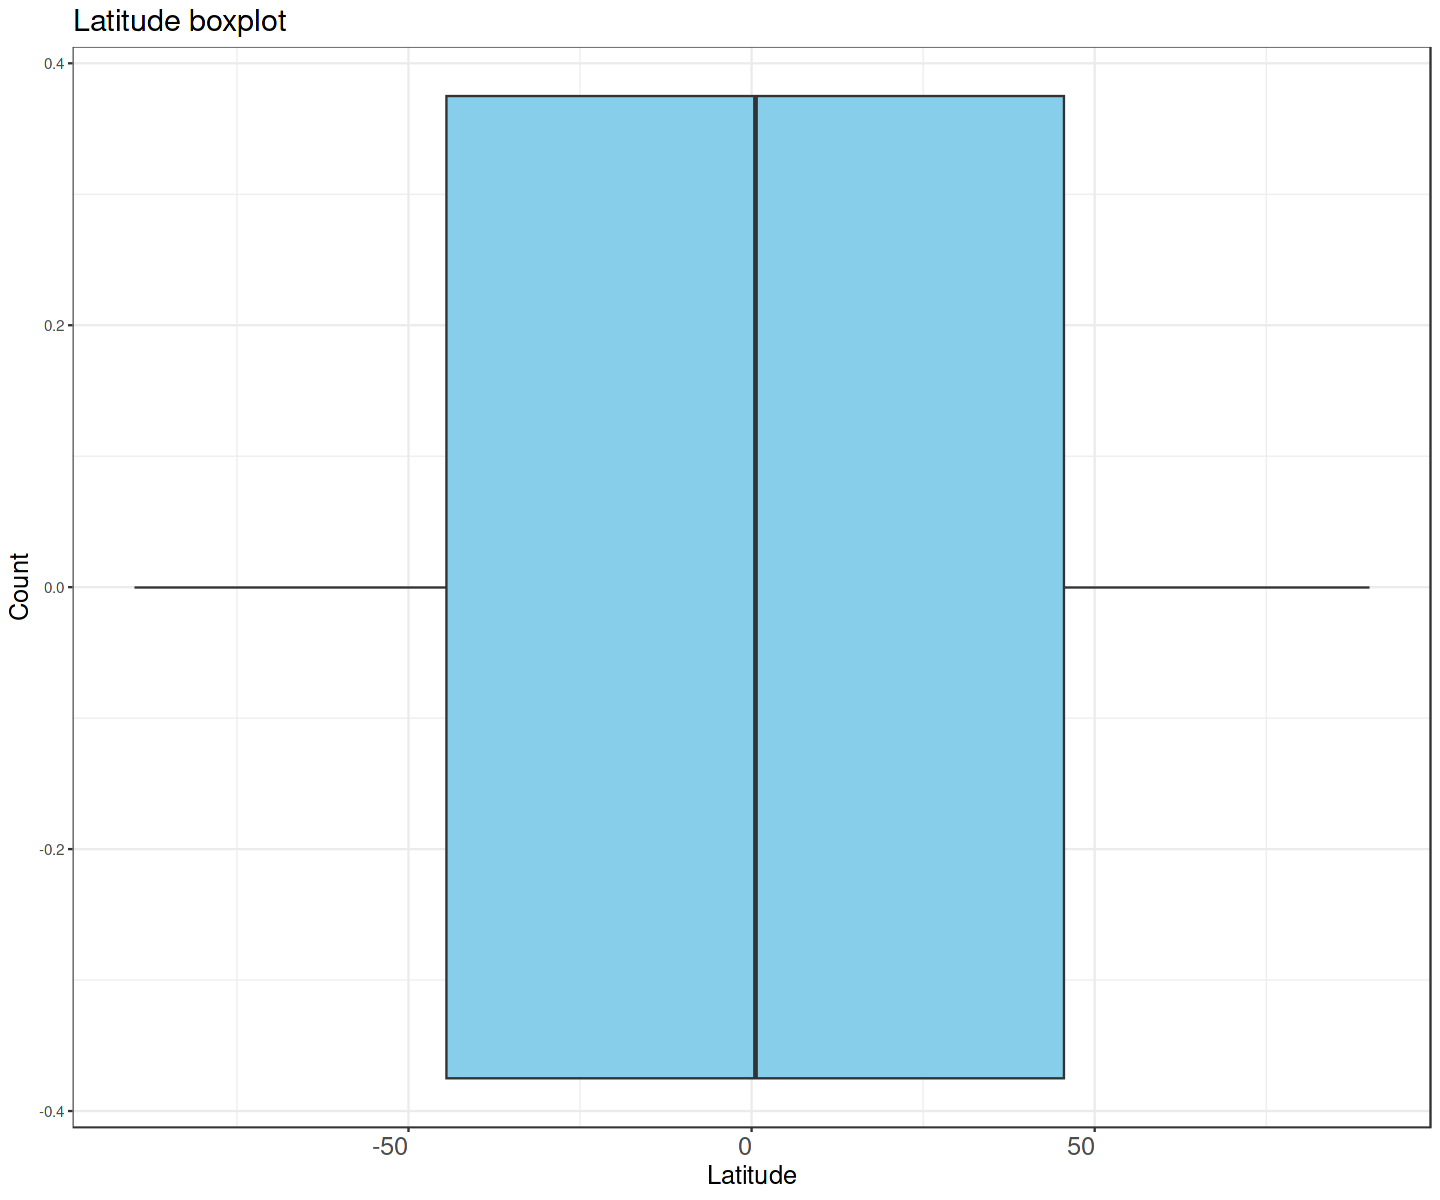

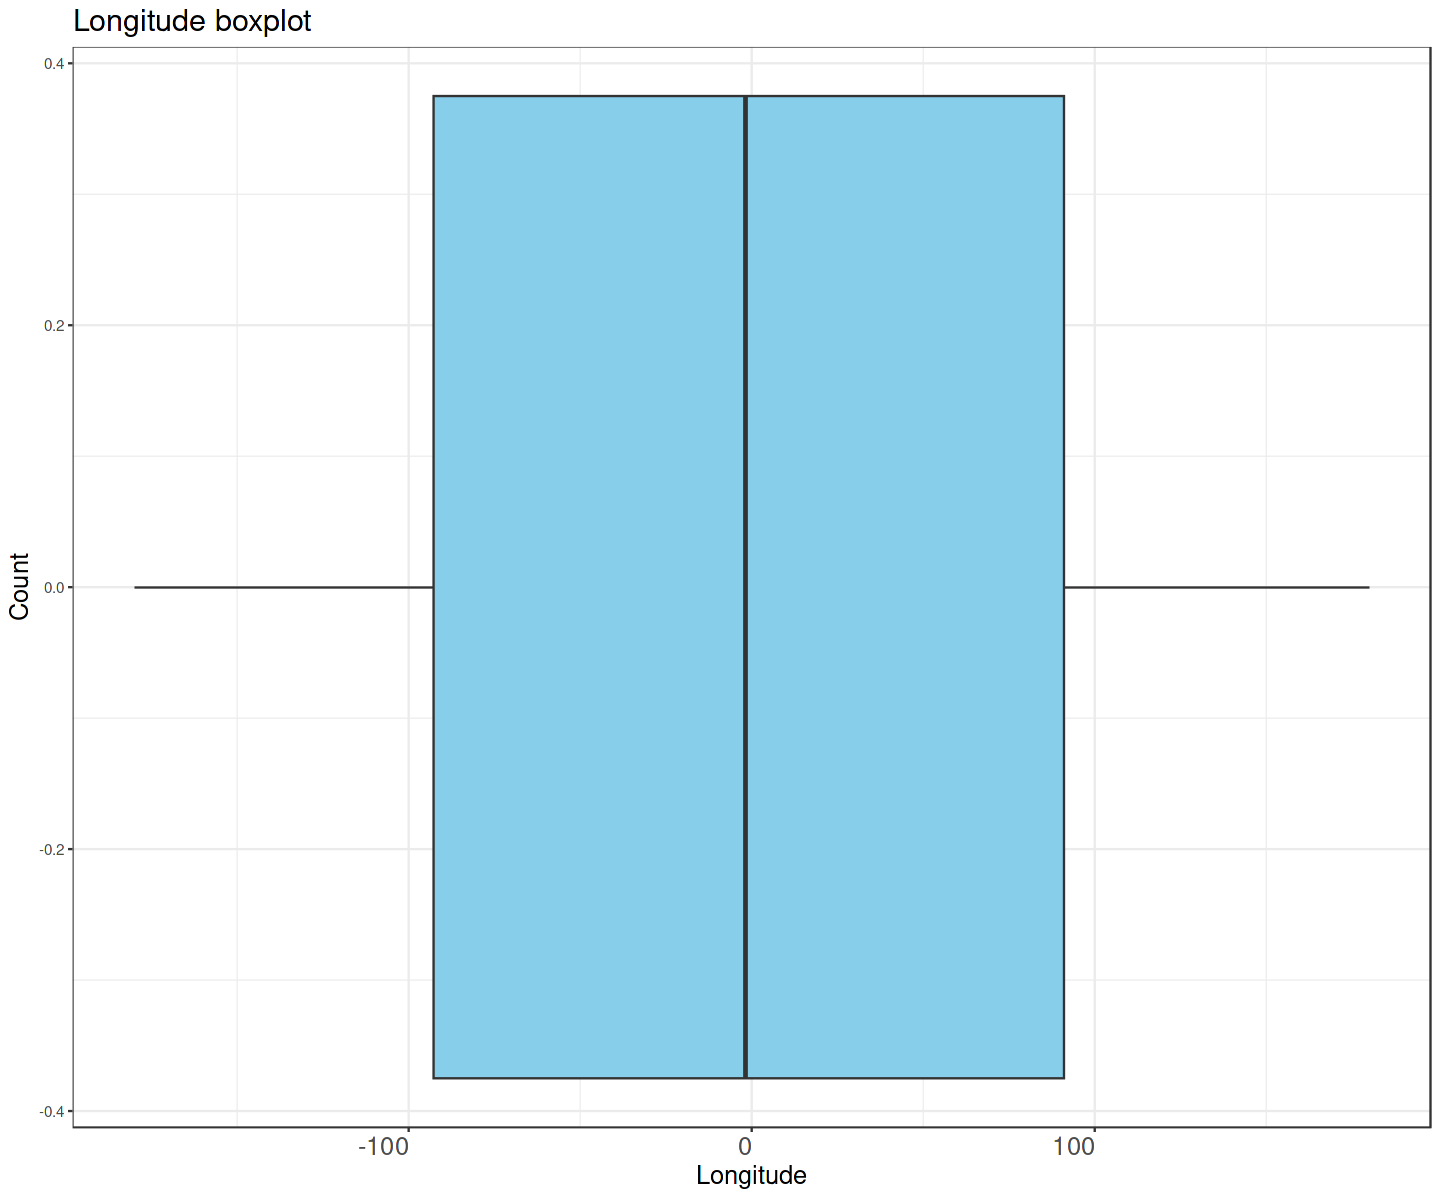

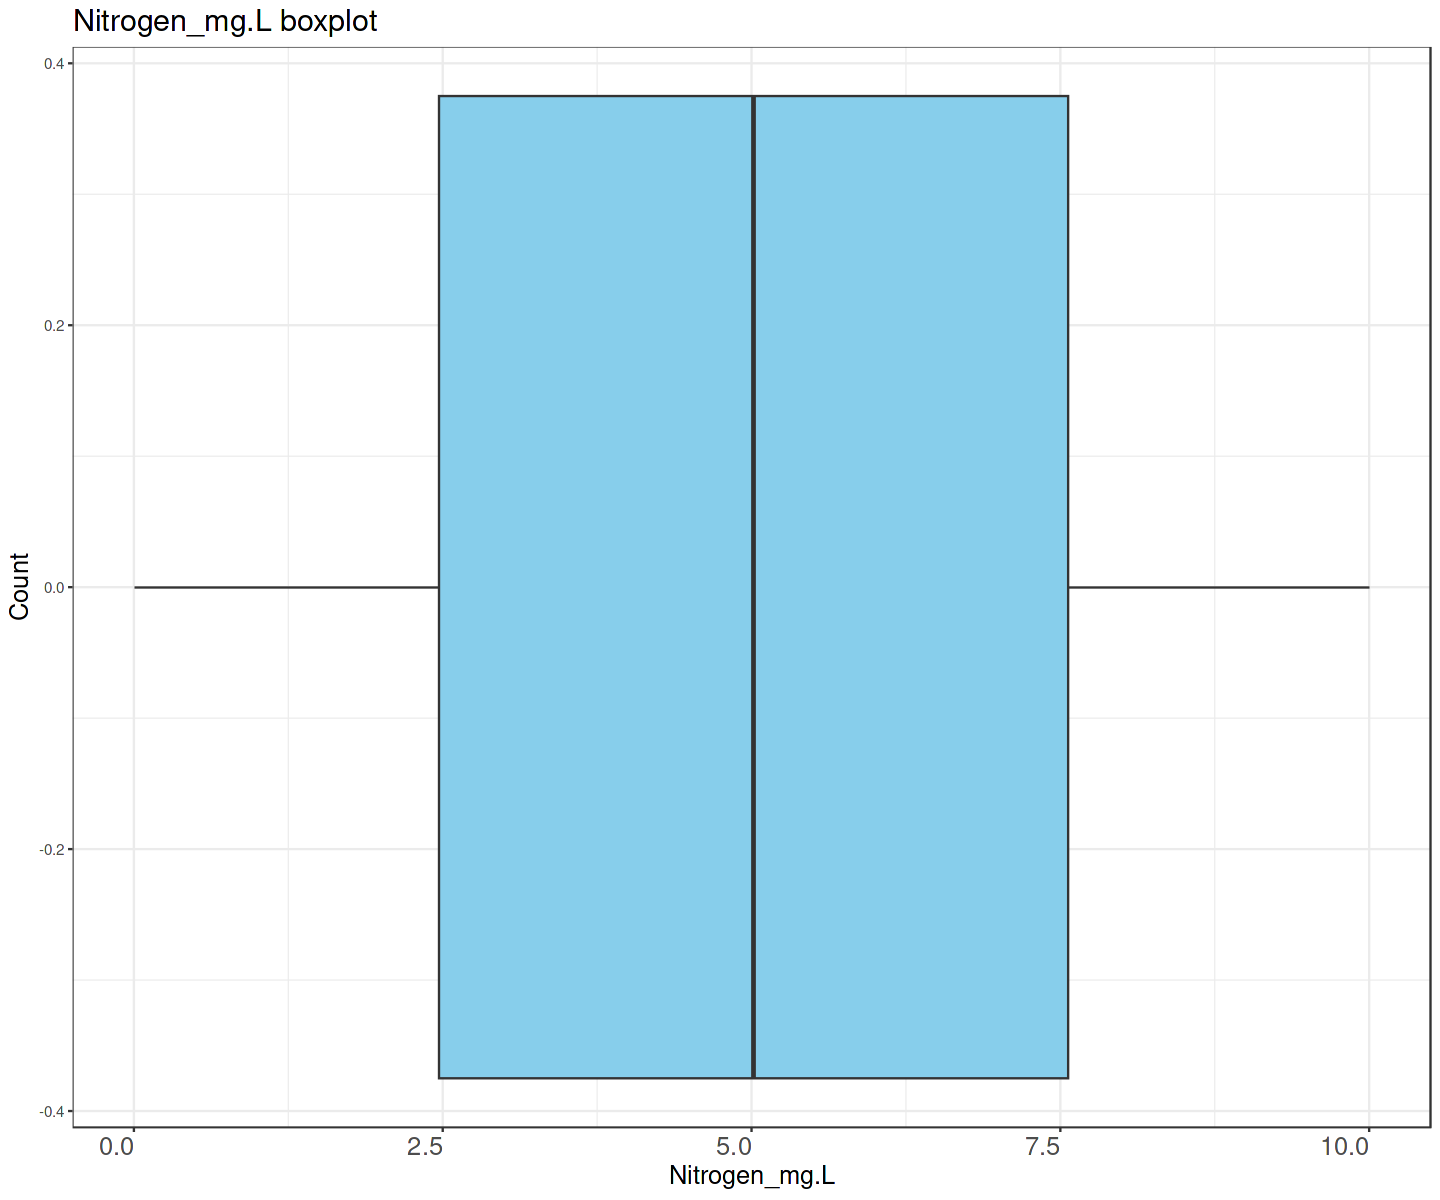

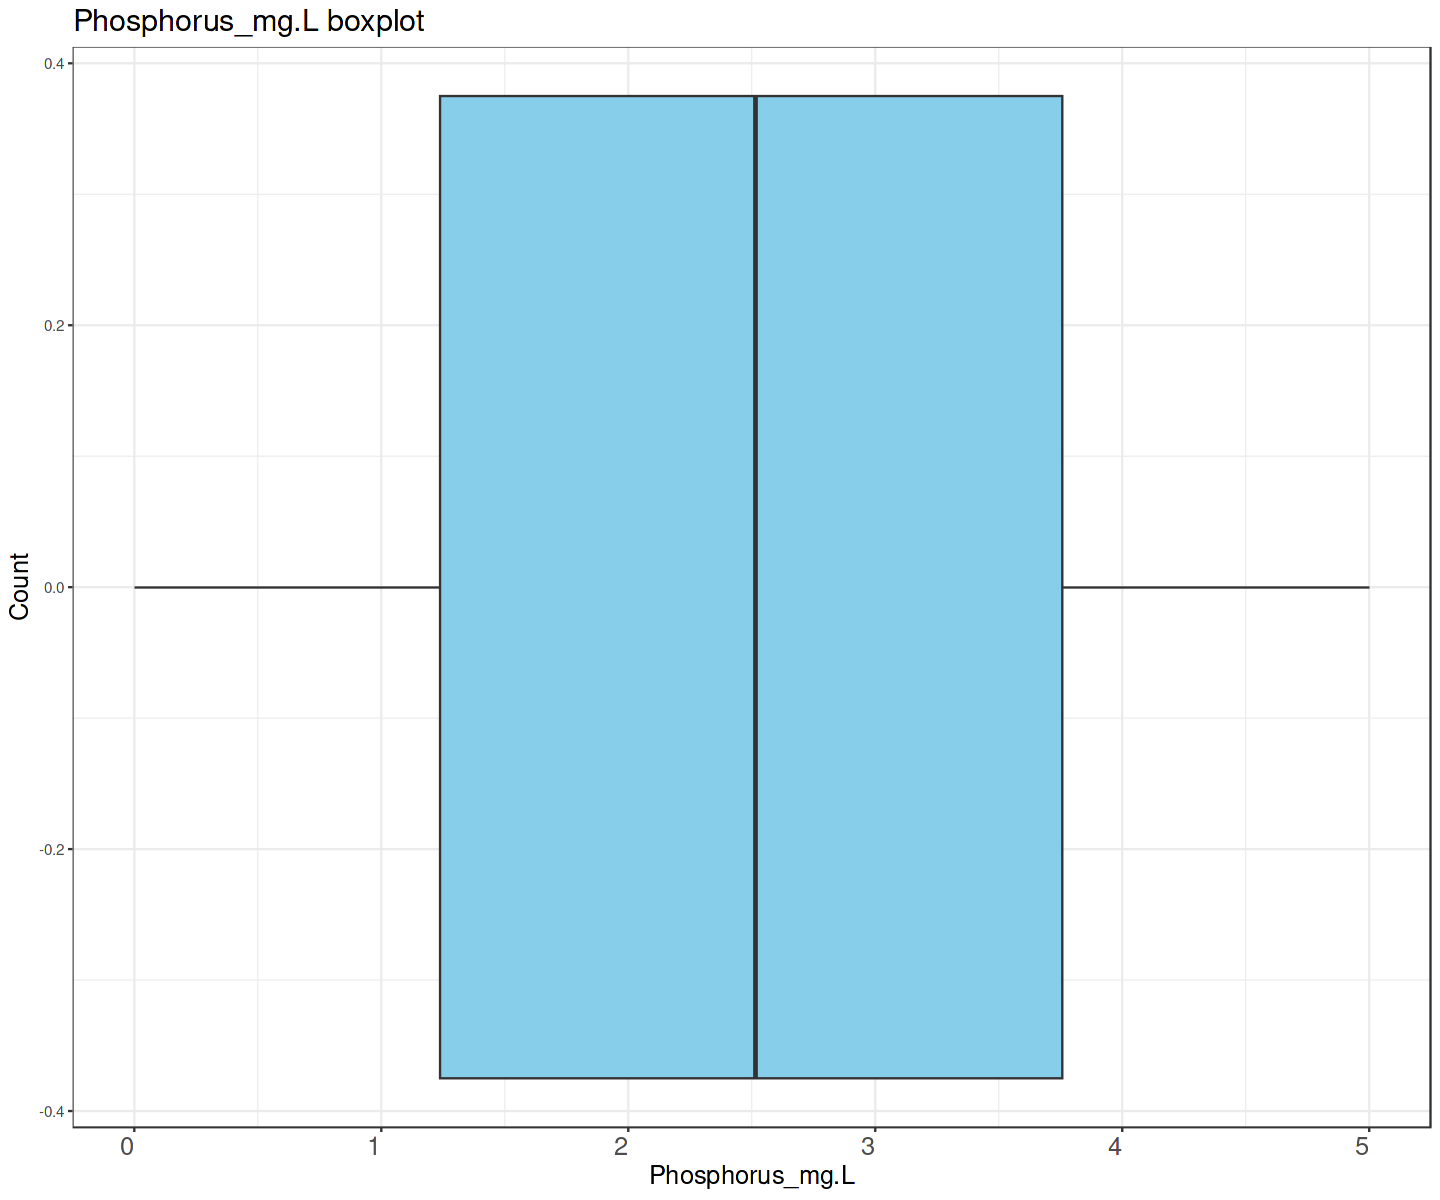

In [18]:
for(i in num_cols){
        a <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    grid.arrange(a, ncol= 1)    
}

## **CountPlot**

In [19]:
st <- df  %>% group_by(State) %>% count(State)
pct <- paste(round(st$n / sum(st$n) * 100 ,1),'%')

In [20]:
a <- ggplot(df) + geom_bar(aes(x= State, fill = State)) + 
            labs(title = 'State Count', x = 'State', y = 'Count', fill = 'State' ) + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1),
                title = element_text(size=15)
            )
b <- ggplot(st, aes(x= 1 , y= n , fill = State)) + geom_bar(stat= 'identity') + 
        geom_text(aes(label = pct), position = position_stack(vjust = 0.5), size = 7) +
        coord_polar('y', start = 0) +
        ggtitle('State Count') +
        labs(x = '' , y = 'Rate') +
        theme_void() +
        theme(
        legend.position = 'none',
        axis.title = element_text(size=15),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

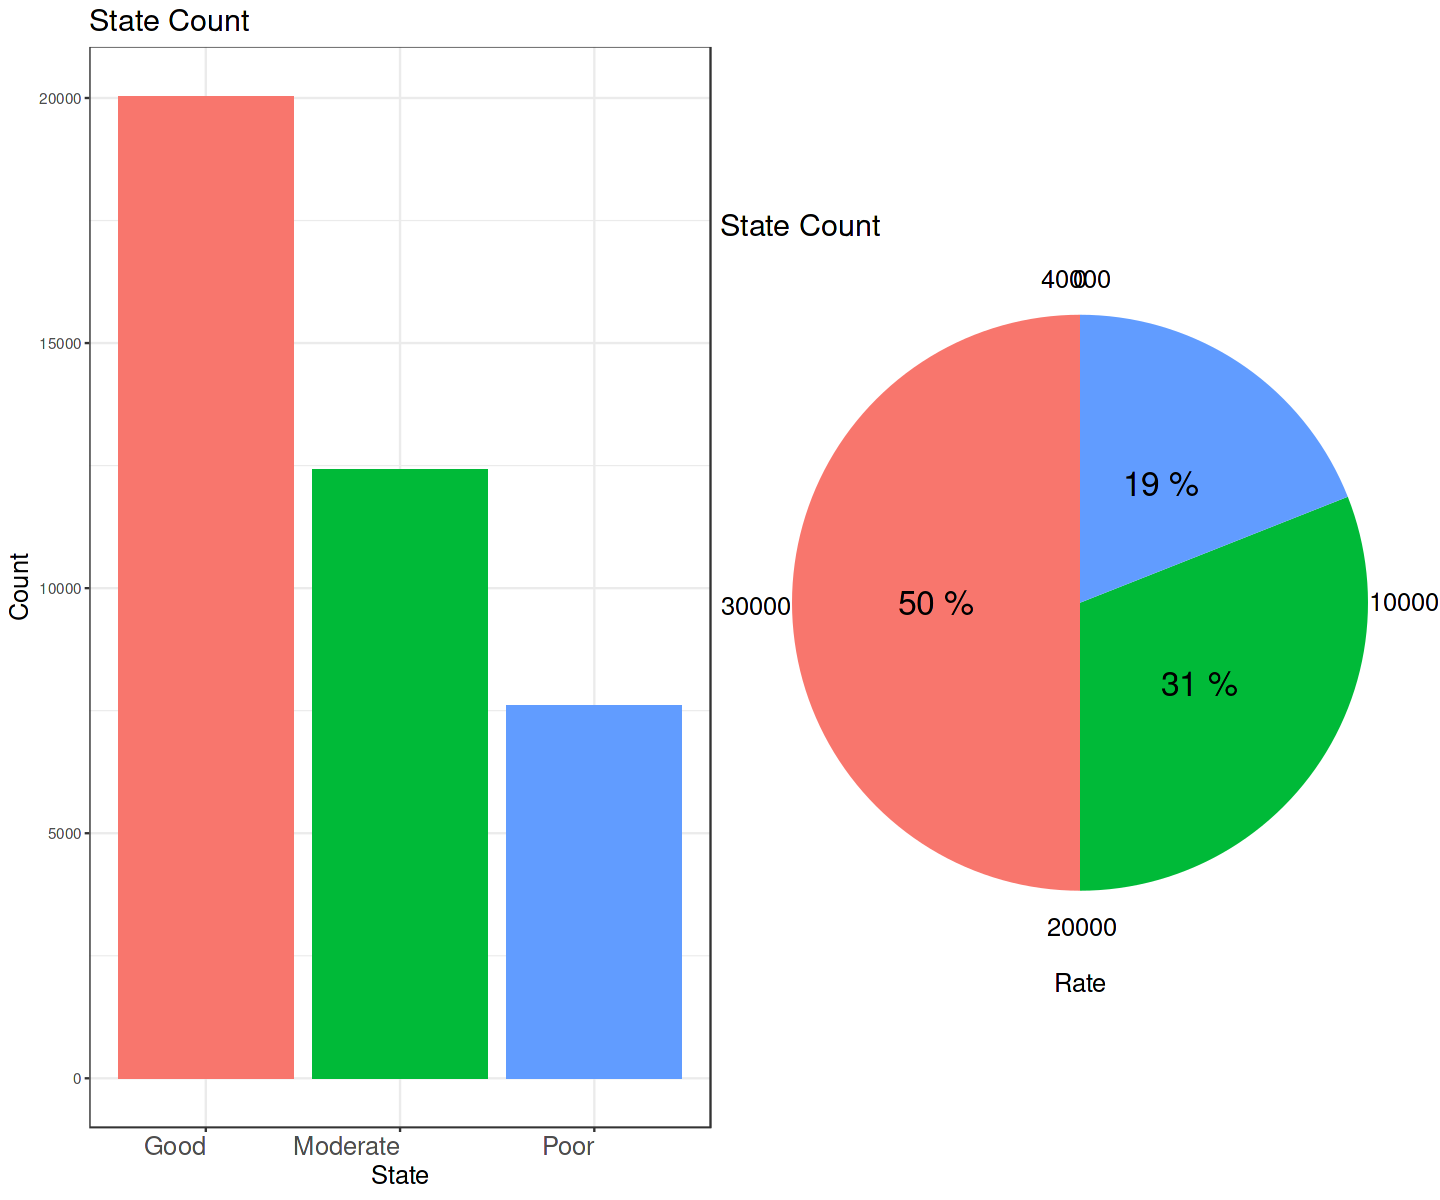

In [21]:
grid.arrange(a,b,ncol=2)

## **Scatter Plot**

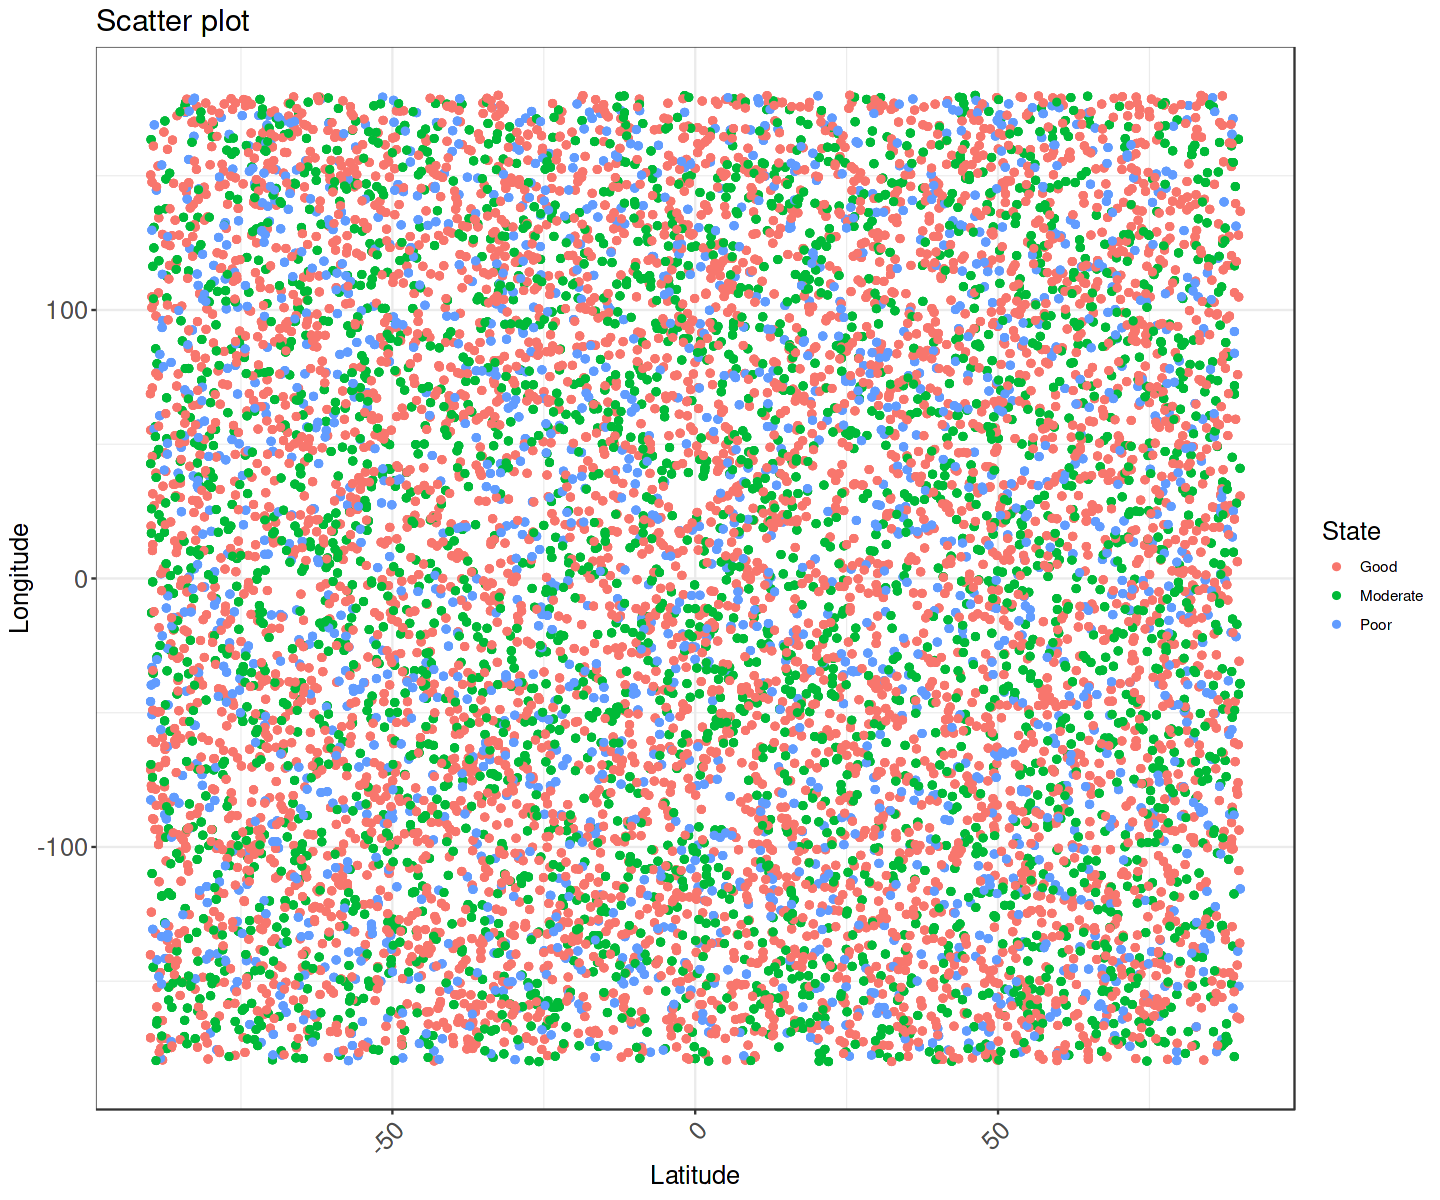

In [22]:
ggplot(df) + geom_point(aes(x= Latitude, y= Longitude, col = State)) +
    theme_bw() +
    ggtitle('Scatter plot') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1 , angle = 45),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

## **Nitrogen(mg/L)	by State**

In [23]:
ng_state <- df %>% 
            group_by(State) %>% 
            summarize(Avg_Nitrogen = mean(Nitrogen_mg.L, na.rm=T))

In [24]:
ng_state

State,Avg_Nitrogen
<fct>,<dbl>
Good,5.004786
Moderate,5.011286
Poor,5.077880


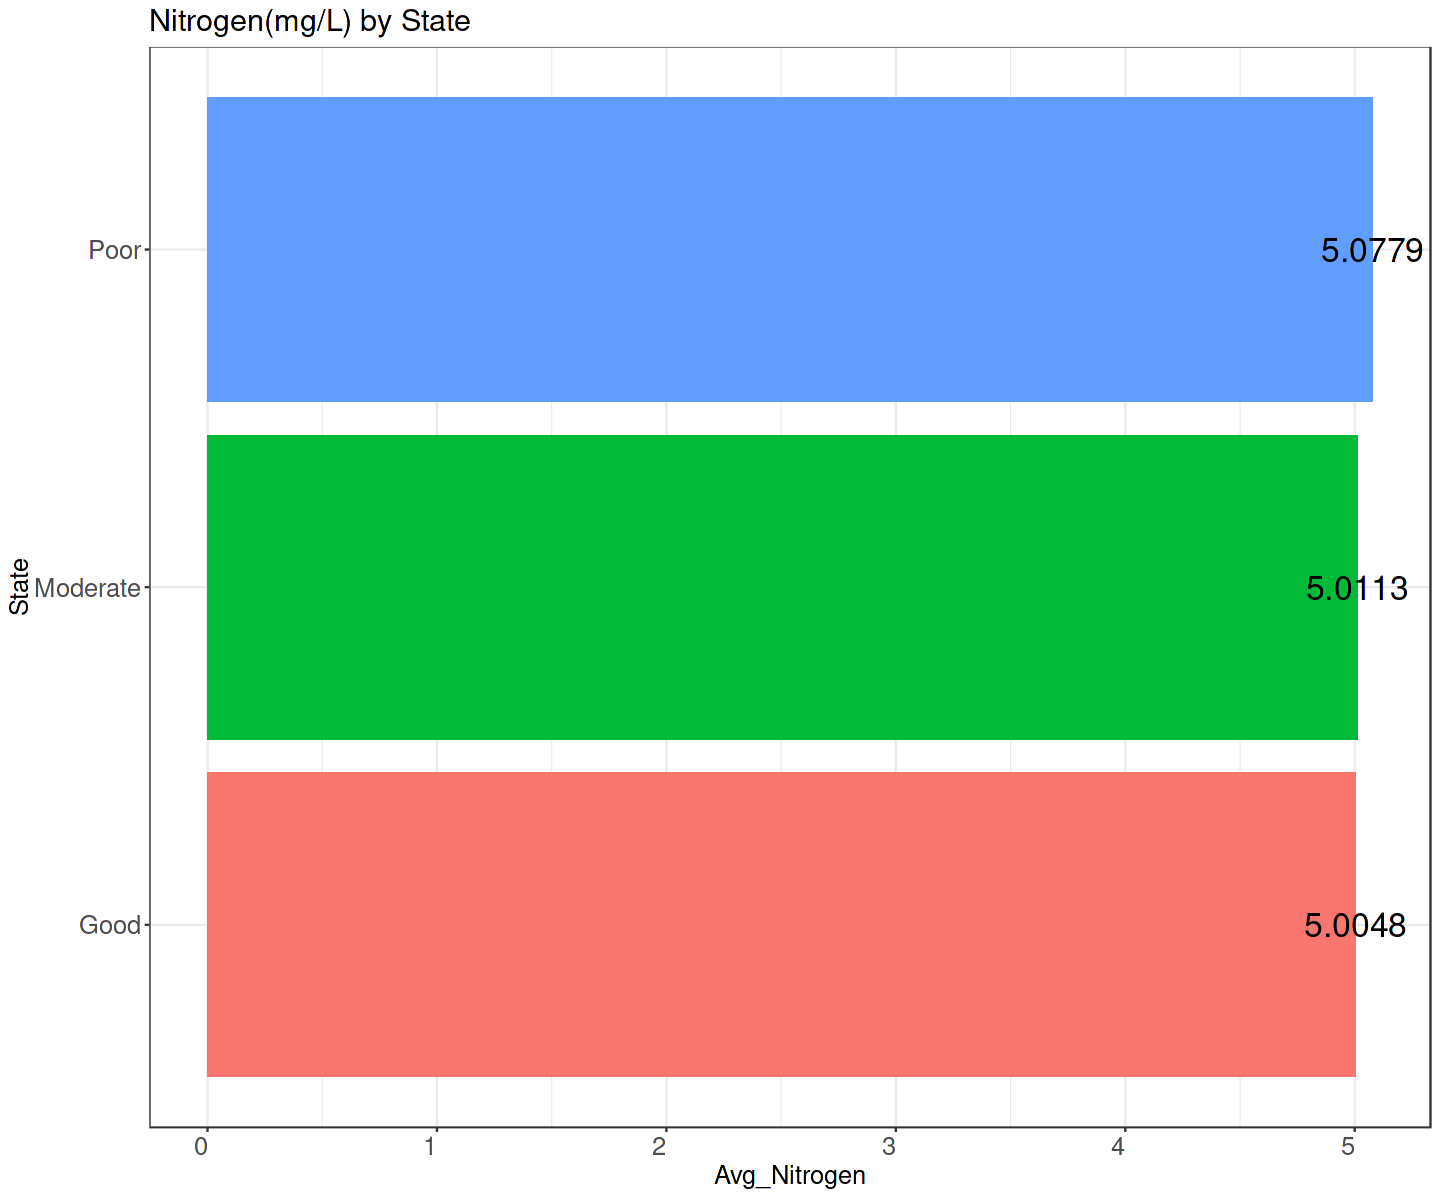

In [25]:
ggplot(ng_state) + geom_col(aes(y = State , x = Avg_Nitrogen, fill = State)) +
    geom_text(aes(y = State , x = Avg_Nitrogen , label = round(Avg_Nitrogen,4)),size = 7)+
    theme_bw() +
    ggtitle('Nitrogen(mg/L) by State') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )
        

## **Phosphorus_mg.L by State**

In [26]:
Ph_state <- df %>% 
            group_by(State) %>% 
            summarize(Avg_Phosphorus = mean(Phosphorus_mg.L, na.rm=T))

In [27]:
Ph_state

State,Avg_Phosphorus
<fct>,<dbl>
Good,2.495554
Moderate,2.514352
Poor,2.487566


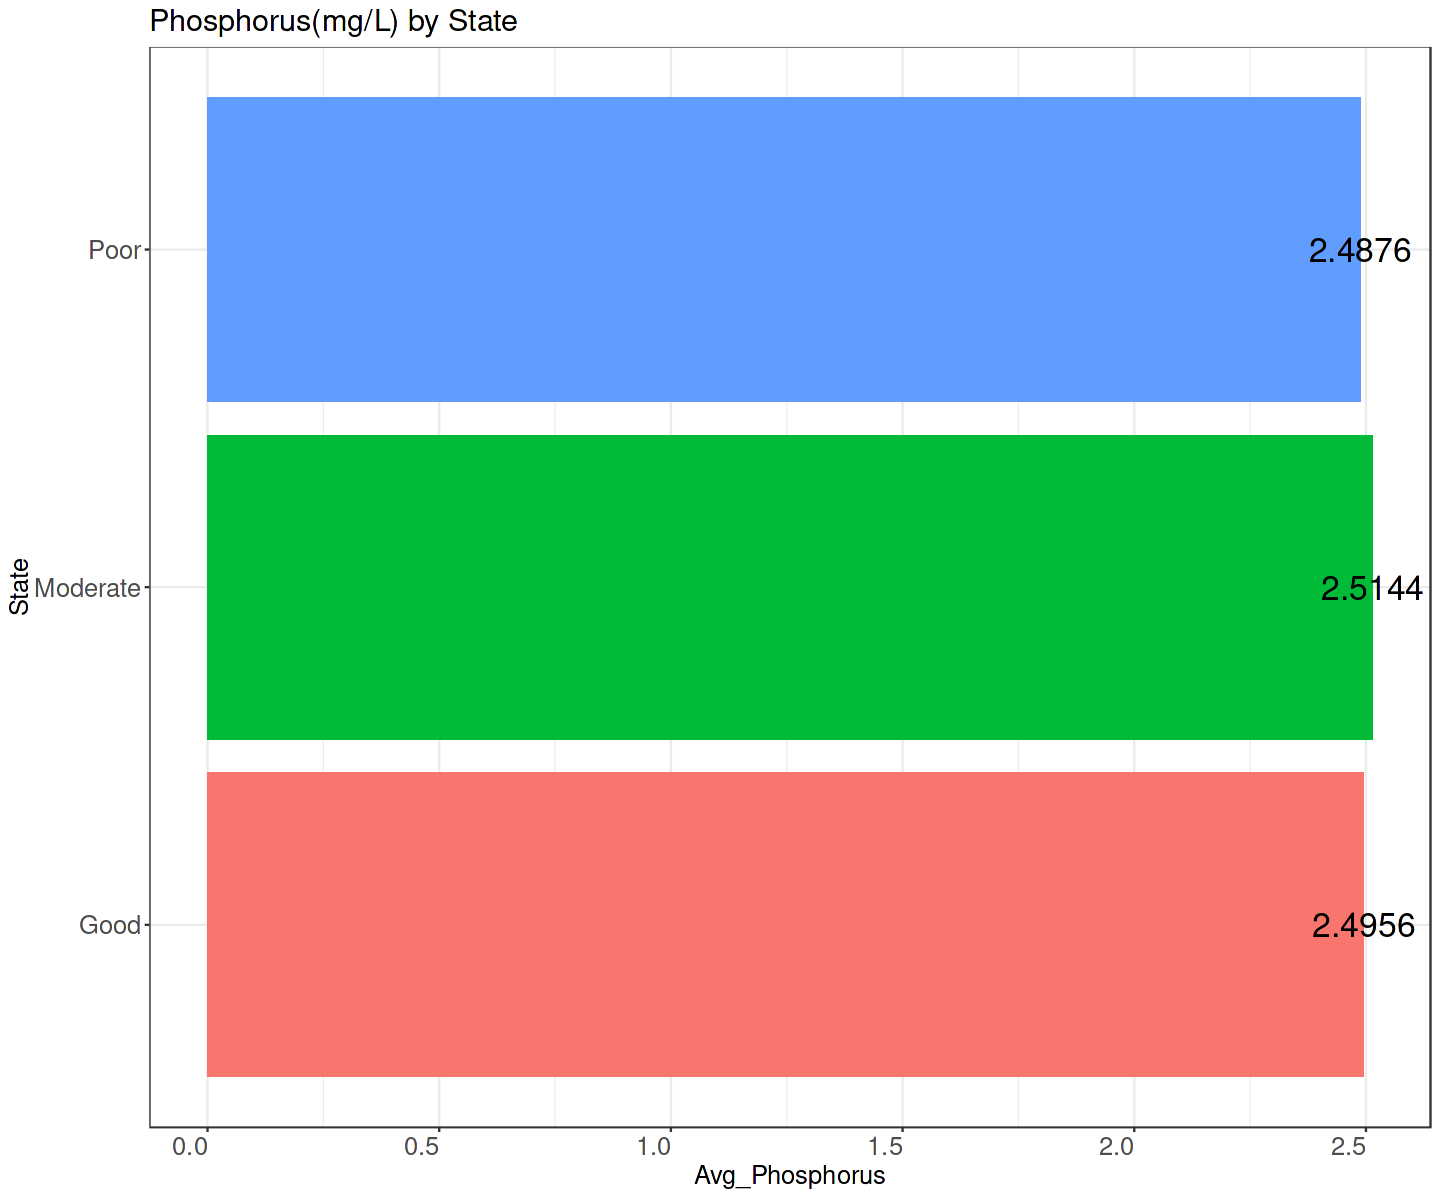

In [28]:
ggplot(Ph_state) + geom_col(aes(y = State , x = Avg_Phosphorus, fill = State)) +
    geom_text(aes(y = State , x = Avg_Phosphorus , label = round(Avg_Phosphorus,4)),size = 7)+
    theme_bw() +
    ggtitle('Phosphorus(mg/L) by State') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

>**The Average Nitrogen level is not much different by State**   
>**The Average phosphorus level is also the same.**

## **Correlation**

In [29]:
df_ori <- df %>% select(-Year,-Month)

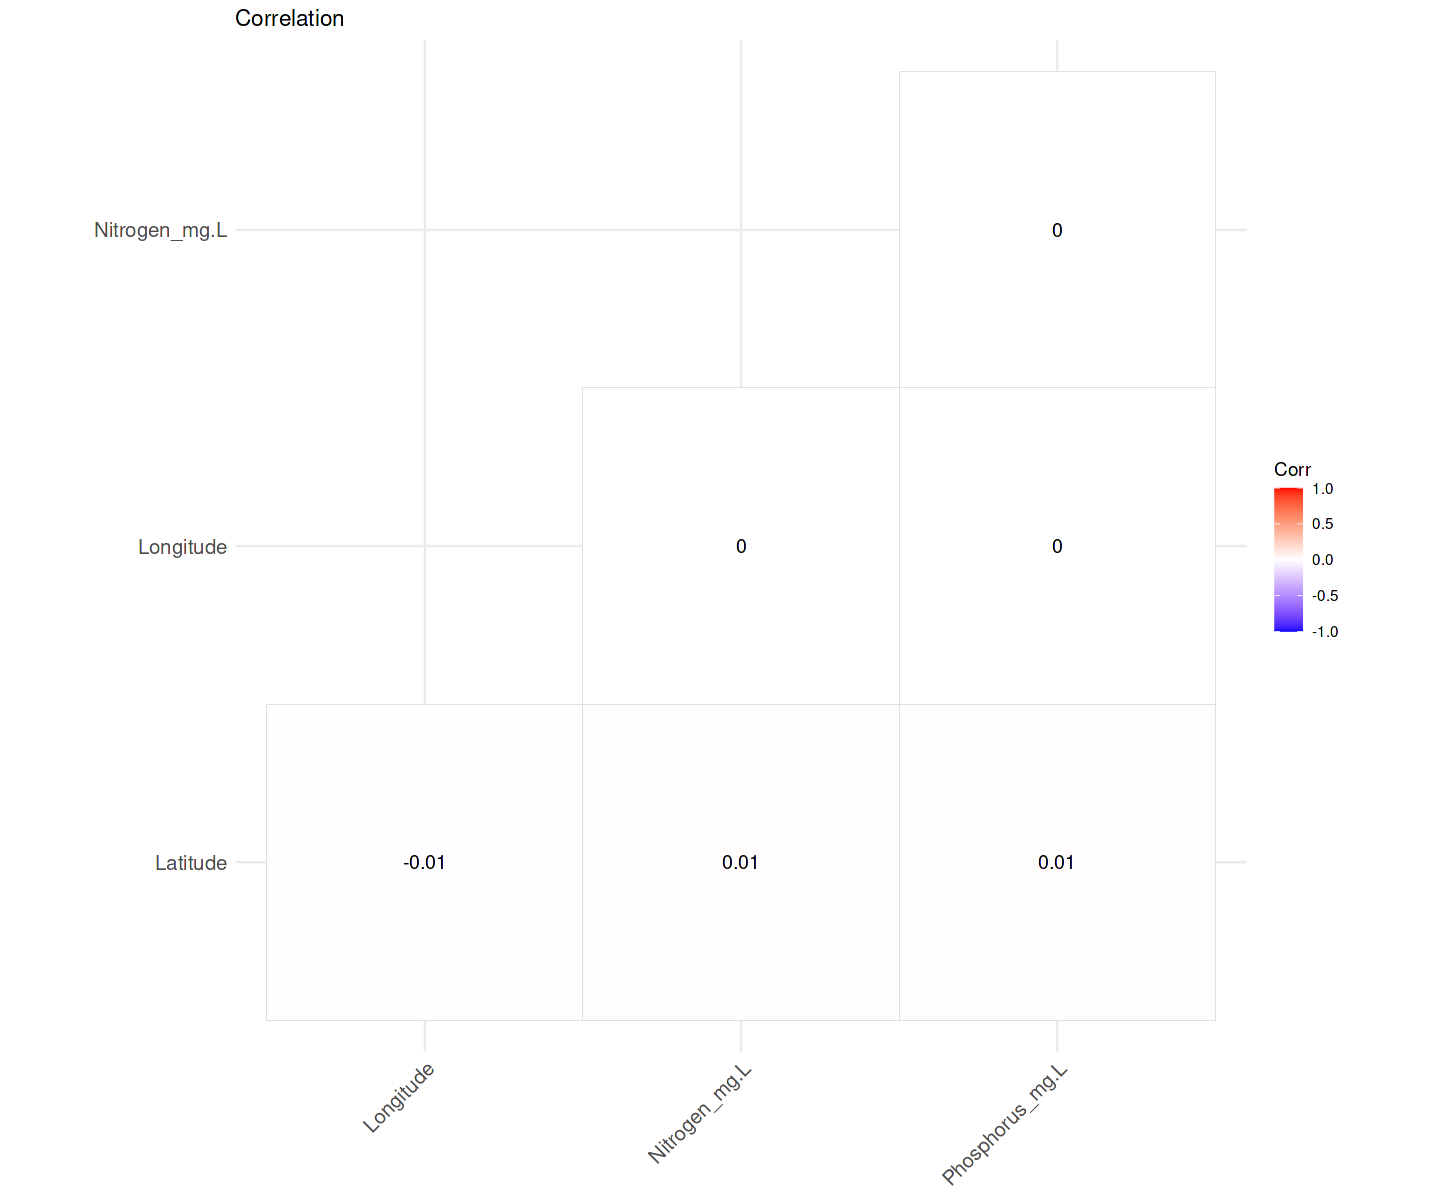

In [30]:
ggcorrplot(cor(df_ori[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [31]:
library(randomForest)
library(Metrics)
library(caret)

randomForest 4.7-1.1



Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘randomForest’




The following object is masked from ‘package:psych’:

    outlier




The following object is masked from ‘package:gridExtra’:

    combine




The following object is masked from ‘package:dplyr’:

    combine




The following object is masked from ‘package:ggplot2’:

    margin




Loading required package: lattice




Attaching package: ‘caret’




The following objects are masked from ‘package:Metrics’:

    precision, recall




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress




## **Data Preprocessing**

In [32]:
df2 <- df %>% select(-Date, -Year, -Month)

**StandardScale**

In [33]:
df2 <- data.frame(scale(df2[,num_cols]))

In [34]:
df2$State <- df$State

## **Train Test Split**

In [35]:
idx <- sample(nrow(df2), 0.7 * nrow(df2))
train <- df2[idx,]
test <- df2[-idx,]

## **RandomForest Model**

In [36]:
rf_md <- randomForest(State~ .,data = train, ntree = 300, type = "class" )

In [37]:
print(rf_md)


Call:
 randomForest(formula = State ~ ., data = train, ntree = 300,      type = "class") 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 2

        OOB estimate of  error rate: 1.4%
Confusion matrix:
          Good Moderate Poor class.error
Good     13919       71   19 0.006424441
Moderate   167     8547   11 0.020401146
Poor        91       34 5197 0.023487411


## **ConfusionMatrix**

In [38]:
pred_rf <- predict(rf_md, test ,type = 'class')
cm_rf <- confusionMatrix(pred_rf, reference = test$State)

In [39]:
cm_rf

Confusion Matrix and Statistics

          Reference
Prediction Good Moderate Poor
  Good     5954       44   36
  Moderate   68     3647   17
  Poor        9        8 2241

Overall Statistics
                                         
               Accuracy : 0.9849         
                 95% CI : (0.9825, 0.987)
    No Information Rate : 0.5016         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9755         
                                         
 Mcnemar's Test P-Value : 1.887e-05      

Statistics by Class:

                     Class: Good Class: Moderate Class: Poor
Sensitivity               0.9872          0.9859      0.9769
Specificity               0.9867          0.9898      0.9983
Pos Pred Value            0.9867          0.9772      0.9925
Neg Pred Value            0.9871          0.9937      0.9946
Prevalence                0.5016          0.3076      0.1908
Detection Rate            0.4952        

## **HeatMap**

In [40]:
rf_heatmap <- data.frame(cm_rf$table)

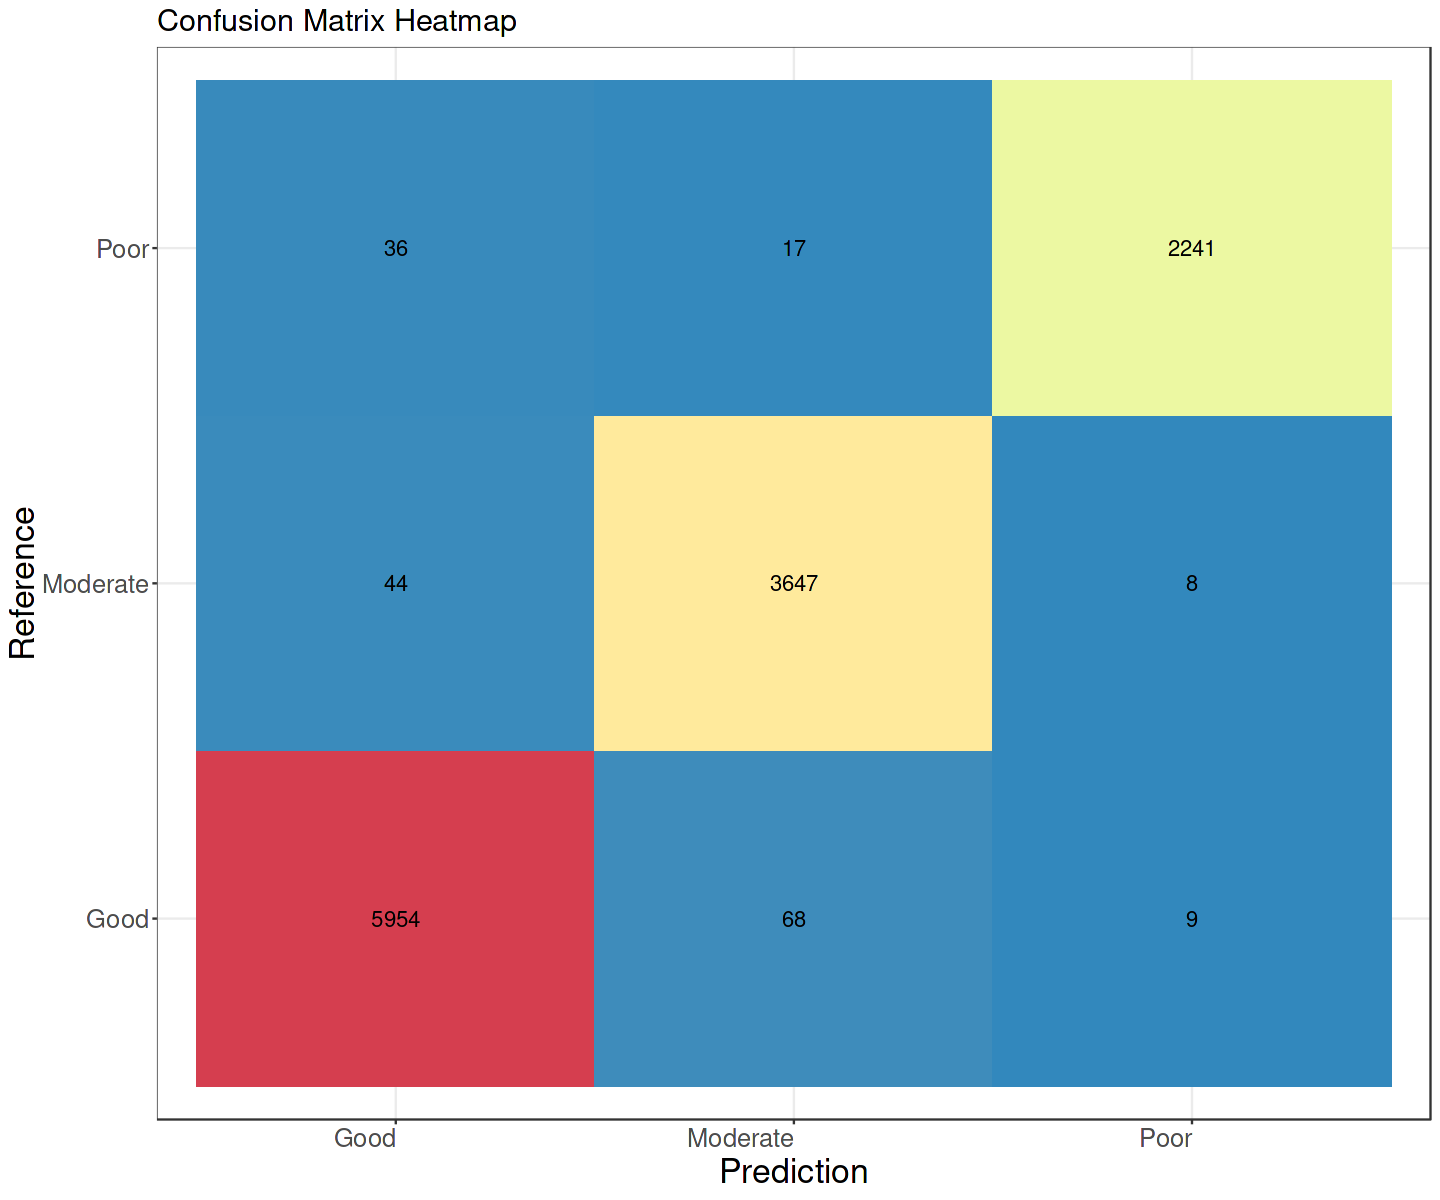

In [41]:
ggplot(rf_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

-----------

**Thankyou. Please leave your advice in the comments**